In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import transforms,datasets

In [28]:
from torchvision.utils import make_grid

In [29]:
transform = transforms.ToTensor()

In [30]:
path = 'PYTORCH_NOTEBOOKS/Data'

In [31]:
train_data  = datasets.CIFAR10(root = path,train =  True,transform = transform,download = True)

Files already downloaded and verified


In [32]:

test_data  = datasets.CIFAR10(root = path,train = False,transform = transform)

In [33]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: PYTORCH_NOTEBOOKS/Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [34]:

test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: PYTORCH_NOTEBOOKS/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [35]:
train_loader = DataLoader(train_data,batch_size = 10,shuffle = True)
test_loader = DataLoader(test_data,batch_size = 10,shuffle=False)

In [36]:
for image,label in train_loader:
    break

In [37]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

Labels: [2 6 7 5 7 2 9 9 1 3]
Class: ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']


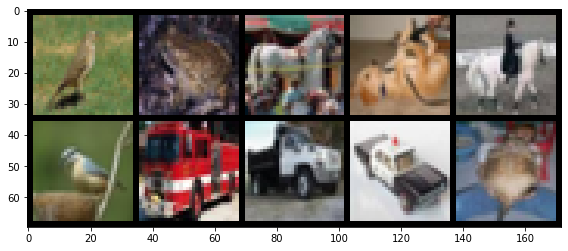

In [38]:
print('Labels:',label.numpy())
print('Class:',class_names)
im = make_grid(image,nrow=5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [39]:
image.shape

torch.Size([10, 3, 32, 32])

In [40]:
conv1 = nn.Conv2d(3,6,5,1)
conv2 = nn.Conv2d(6,16,3,1)

In [41]:
x = conv1(image)

In [42]:
x.shape

torch.Size([10, 6, 28, 28])

In [43]:
x = torch.max_pool2d(x,2,2)

In [44]:
x.shape

torch.Size([10, 6, 14, 14])

In [45]:
x= conv2(x)

In [46]:
x.shape

torch.Size([10, 16, 12, 12])

In [47]:
x = torch.max_pool2d(x,2,2)

In [48]:
x.shape

torch.Size([10, 16, 6, 6])

In [49]:
class ConvolutionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(6*6*16,120)
        self.fc2 = nn.Linear(120,80)
        self.fc3 = nn.Linear(80,10)
        
    def forward(self,x):
        x = self.conv1(x)
        x = torch.max_pool2d(x,2,2)
        x = self.conv2(x)
        x = torch.max_pool2d(x,2,2)
        x = x.view(-1,6*6*16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,1)

In [50]:
torch.manual_seed(101)
model = ConvolutionModel()
model

ConvolutionModel(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

In [51]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [52]:
import time
strt = time.time()
epochs = 10

#Markers
train_correct = []
train_losses = []
test_correct = []
test_losses  = []

for i in range(epochs):
    tr_crr = 0
    ts_crr = 0
    for b,(x_train,y_train) in enumerate(train_loader):
        b += 1
        y_pred = model(x_train)
        loss=  criterion(y_pred,y_train)
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted==y_train).sum()
        tr_crr+=batch_corr
        
        # update grades
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (b%600==0):
            print(f" epochs {i} loss: {loss.item():10.8f} accuracy: {100 * tr_crr.item()/ (10*b):7.3f}%")
    train_losses.append(loss)
    train_correct.append(tr_crr)
    
    with torch.no_grad():
        for b,(x_test,y_test) in  enumerate(test_loader):
            y_eval = model(x_test)
            predicted = torch.max(y_eval.data,1)[1]
            batch_corr = (predicted==y_test).sum()
            ts_crr+=batch_corr
    loss = criterion(y_eval,y_test)
    test_correct.append(tr_crr)
    test_losses.append(loss)

print(f" Duration took {time.time() - strt}seconds")

 epochs 0 loss: 1.74779856 accuracy:  27.283%
 epochs 0 loss: 1.20687449 accuracy:  33.058%
 epochs 0 loss: 1.48869073 accuracy:  36.978%
 epochs 0 loss: 1.30340397 accuracy:  39.354%
 epochs 0 loss: 1.08097458 accuracy:  41.573%
 epochs 0 loss: 1.32034612 accuracy:  43.000%
 epochs 0 loss: 2.04901266 accuracy:  44.424%
 epochs 0 loss: 1.16798043 accuracy:  45.631%
 epochs 1 loss: 1.35510421 accuracy:  57.150%
 epochs 1 loss: 0.94137990 accuracy:  57.742%
 epochs 1 loss: 1.17685413 accuracy:  57.894%
 epochs 1 loss: 1.45985544 accuracy:  57.854%
 epochs 1 loss: 1.08721220 accuracy:  58.023%
 epochs 1 loss: 0.82448065 accuracy:  58.339%
 epochs 1 loss: 0.82766664 accuracy:  58.493%
 epochs 1 loss: 1.68778586 accuracy:  58.725%
 epochs 2 loss: 0.68750966 accuracy:  64.333%
 epochs 2 loss: 0.60931569 accuracy:  63.158%
 epochs 2 loss: 1.23656714 accuracy:  63.489%
 epochs 2 loss: 0.98773736 accuracy:  63.425%
 epochs 2 loss: 0.62807024 accuracy:  63.723%
 epochs 2 loss: 1.40430140 accurac

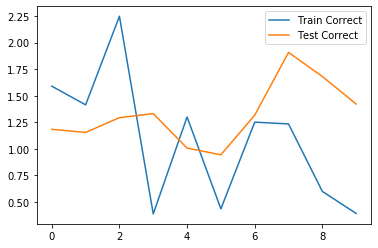

In [54]:
plt.plot(train_losses,label = 'Train Correct')
plt.plot(test_losses,label = 'Test Correct')
plt.legend()

In [64]:
print(f"{test_correct[-1].item()*100/100000:.3f}%")

39.200%


In [65]:
test_correct

[tensor(22976),
 tensor(29385),
 tensor(31886),
 tensor(33554),
 tensor(34902),
 tensor(35979),
 tensor(36861),
 tensor(37784),
 tensor(38533),
 tensor(39200)]

In [66]:
from sklearn.metrics import confusion_matrix

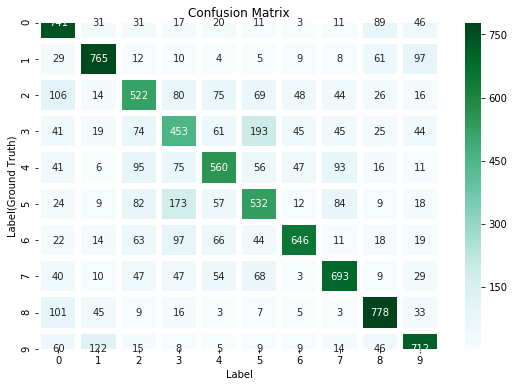

In [74]:
test_load_all = DataLoader(test_data , batch_size = 10000 , shuffle = False)

with torch.no_grad():
    for x_test,y_test in test_load_all:
        y_pred = model(x_test)
        prr = torch.max(y_pred.data , 1)[1]
        correct = (prr==y_test).sum()
arr = confusion_matrix(y_test.view(-1),prr.view(-1))
df_cm = pd.DataFrame(arr,class_names,class_names)
plt.figure(figsize=(9,6))
sns.heatmap(arr,annot=True,cmap='BuGn',fmt='d',linewidths=5)
plt.xlabel("Label")
plt.ylabel("Label(Ground Truth)")
plt.title("Confusion Matrix")
plt.show()